## Data inladen en preprocessen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as minimize

In [2]:
# data = np.loadtxt("data/AiCU/Greenhouse_climate.csv")
# /home/roelink/Documents/Project2/data/AiCU/Greenhouse_climate.csv
GHClim = pd.read_csv("data/Croperators/Greenhouse_climate.csv") 
Crop = pd.read_csv("data/Croperators/CropManagement.csv") 
irri = pd.read_csv("data/Croperators/Irrigation.csv") 
prod = pd.read_csv("data/Croperators/Production.csv") 
vip = pd.read_csv("data/Croperators/vip.csv") 

In [3]:
teams = ["AiCU", "Croperators", "DeepGreens", "iGrow", "Reference(Growers)","Sonoma"]
data = {}
for team in teams:
    GHClim = pd.read_csv(f"data/{team}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{team}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{team}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{team}/Production.csv") 
    vip = pd.read_csv(f"data/{team}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)
    
    GHClim.fillna(method='bfill', inplace=True)
    Crop.fillna(method='bfill', inplace=True)
    irri.fillna(method='bfill', inplace=True)
    prod.fillna(method='bfill', inplace=True)
    vip.fillna(method='bfill', inplace=True)
    
    # If first column is NaN
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    prod['time'] = prod['time']*288 - 12477888
    prod = prod.set_index('time')
    prod = prod.reindex(range(prod.index.min(),prod.index.max()+1)).reset_index()
    prod = prod.interpolate()
    prod.set_index('time')
    prod = prod.drop(['time'], axis=1)
    GHClim = GHClim.drop(['GHtime'], axis=1)
#     GHClim = GHClim.drop(['CO2air'], axis=1)

    vip = vip.drop(['time'], axis=1)
#     Crop['weeks'] = (Crop['weeks'] - 34) * 7 * 288 
#     Crop = Crop.set_index('weeks')
#     Crop = Crop.reindex(range(Crop.index.min(),Crop.index.max()+1)).reset_index()
#     Crop = Crop.interpolate()
#     Crop.set_index('weeks')

    GHClim = GHClim[:-12]
    vip = vip[:-12]
    data[team] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}


## Random Forest

In [4]:
x = pd.concat([data['Croperators']['GHClim'], data['Croperators']['vip']], axis=1, join='inner')
y = data['Croperators']['prod']['Total_Prod_cum']

Visualizing Important Features Croperators


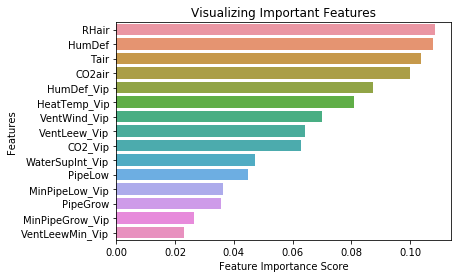

Visualizing Important Features DeepGreens


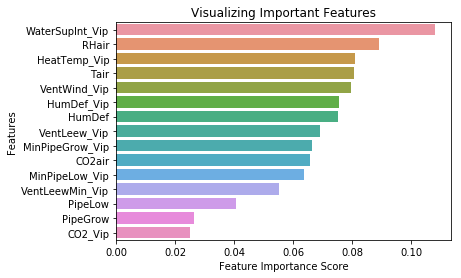

Visualizing Important Features iGrow


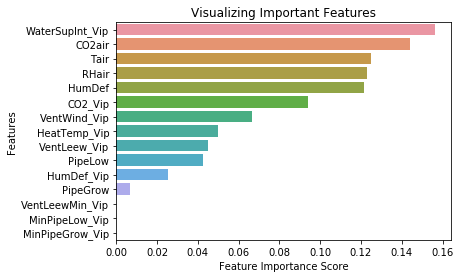

Visualizing Important Features Reference(Growers)


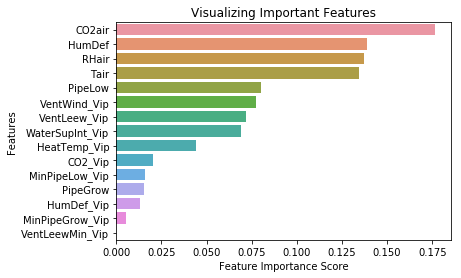

Visualizing Important Features Sonoma


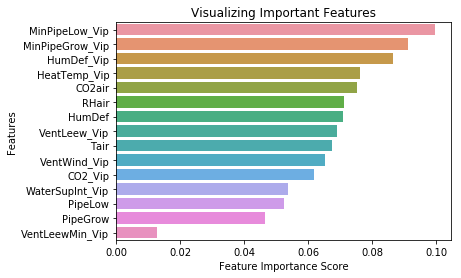

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

teams2 = ["Croperators", "DeepGreens", "iGrow", "Reference(Growers)","Sonoma"]
for team in teams2:
    tmp = pd.concat([data[team]['GHClim'], data[team]['vip']], axis=1, join='inner')
    feature_names = tmp.columns[:15]
    X = tmp
    y = data[team]['prod']['Total_Prod_cum']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train.astype('int'))

    y_pred=clf.predict(X_test)

    feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
    feature_imp



    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)


    print("Visualizing Important Features", team)
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
# feature_names = AiCU.columns[:47]
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 


# clf=RandomForestClassifier(n_estimators=100)
# clf.fit(X_train,y_train.astype('int'))

# y_pred=clf.predict(X_test)